# Importing the dataset

In [71]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Read the dataset
dataset_path = "cvd_data_cleaned.csv"
# dataset_path = "C:\My\Top-up Degree\Data Science\Data Science - Assignment\Data set\Kaggle\Cardiovascular Diseases Risk Prediction Dataset\CVD_cleaned.csv"
data = pd.read_csv(dataset_path)

In [65]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Exploratory Data Anlysis

## Univariate analysis

### For numerical columns

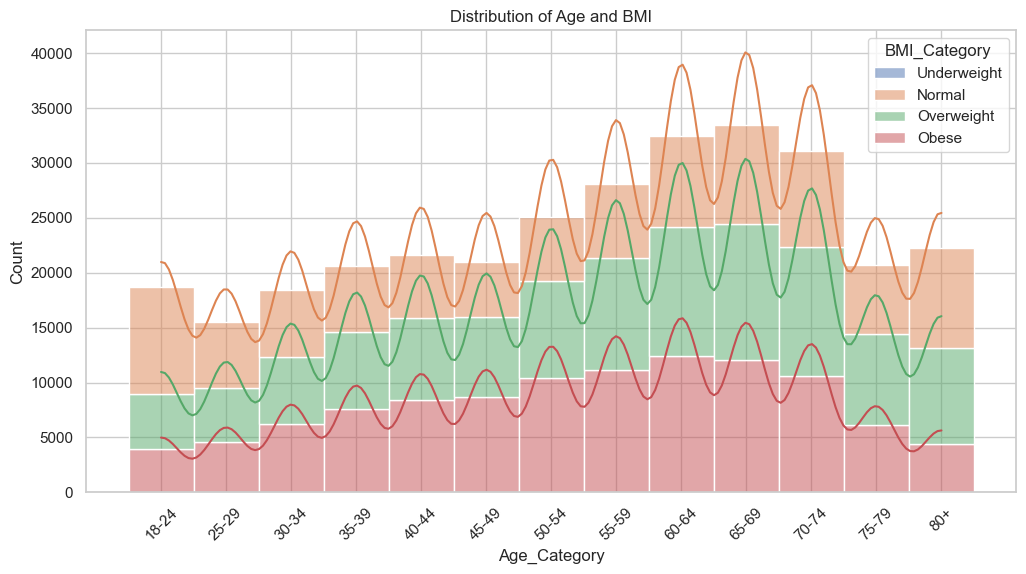

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bin edges for BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]

# Create a copy of the DataFrame with BMI categories
data_copy = data.copy()
data_copy["BMI_Category"] = pd.cut(data_copy["BMI"], bins=bmi_bins, labels=bmi_labels)

# Define the desired order of Age_Category
age_order = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"]

# Convert Age_Category to a Categorical data type with specified order
data_copy["Age_Category"] = pd.Categorical(data_copy["Age_Category"], categories=age_order, ordered=True)

# Sort the DataFrame based on the categorical order
data_copy = data_copy.sort_values("Age_Category")

# Create the histogram with grouped BMI categories
plt.figure(figsize=(12, 6))
sns.histplot(data=data_copy, x="Age_Category", hue="BMI_Category", multiple="stack", bins=10, kde=True)
plt.title("Distribution of Age and BMI")
plt.xticks(rotation=45)
plt.show()

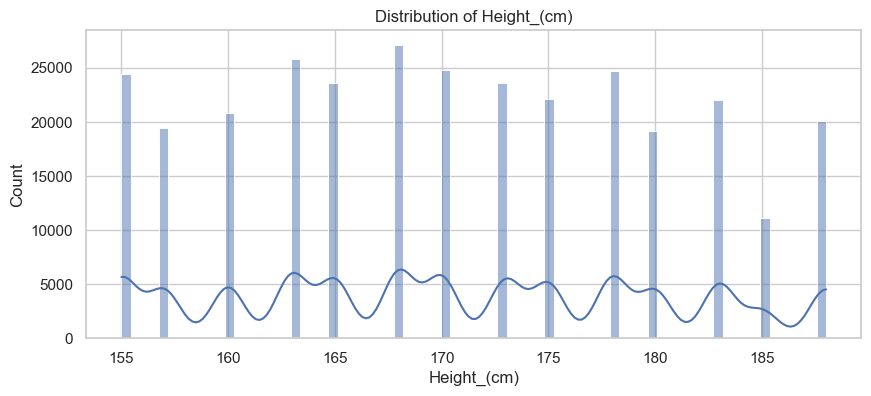

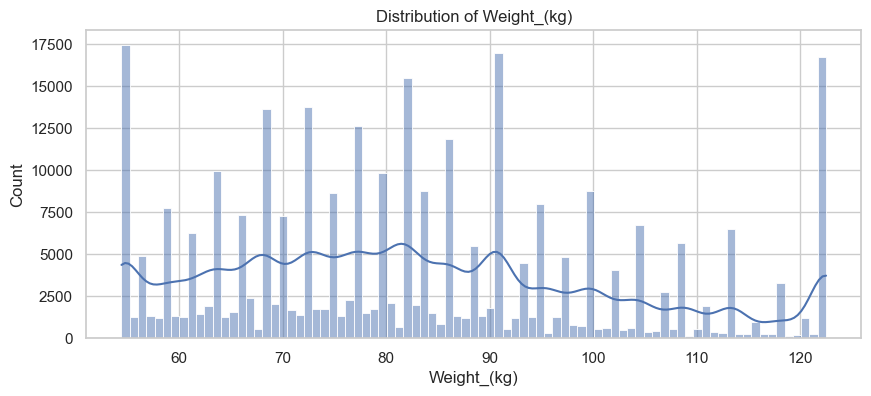

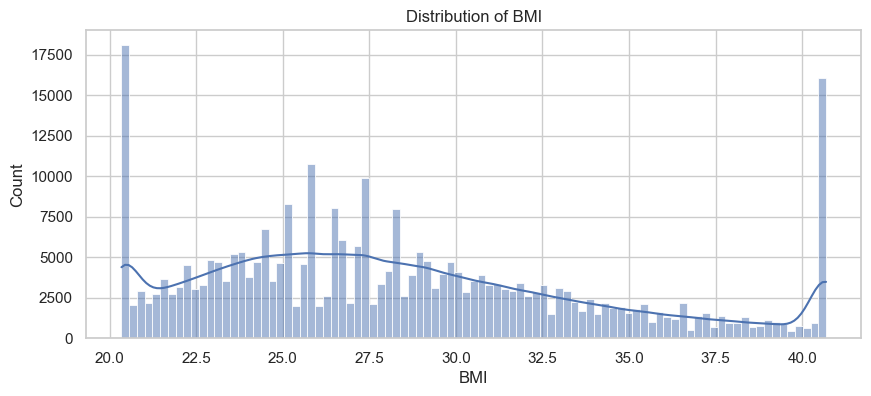

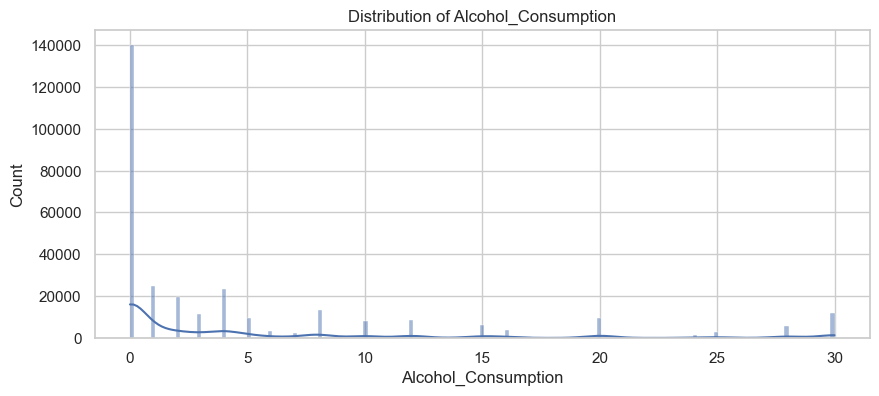

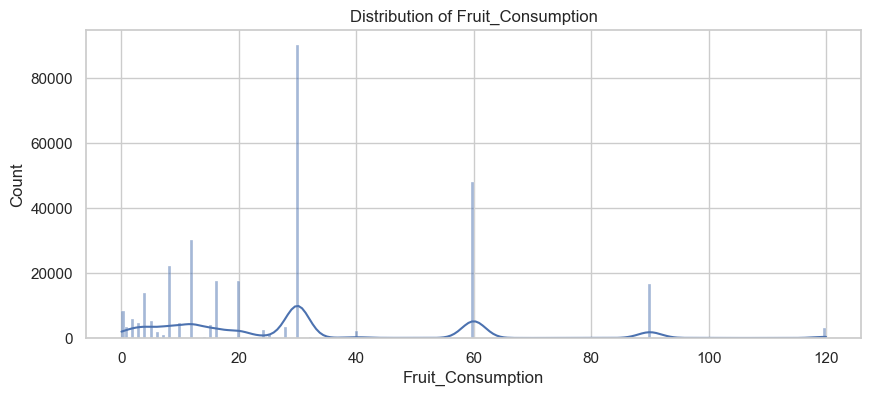

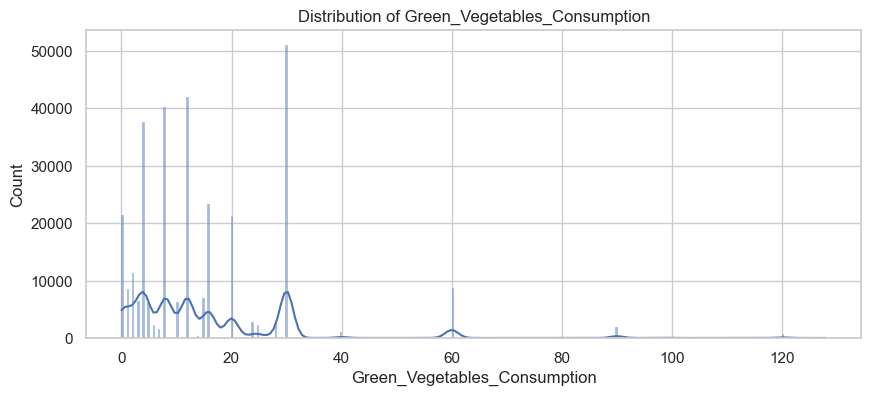

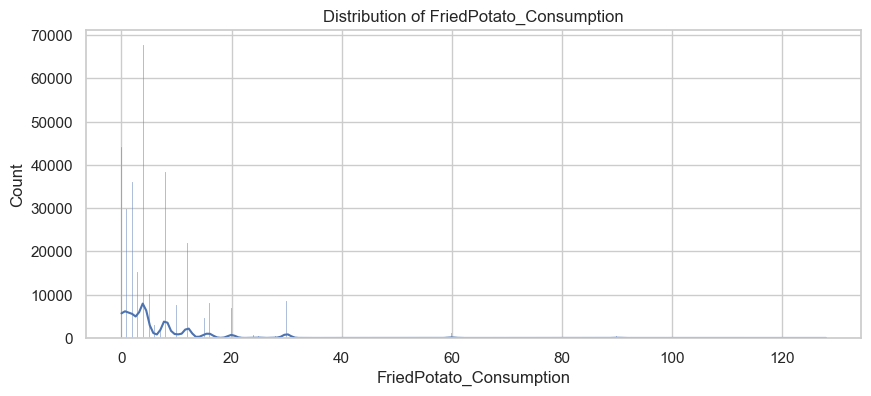

In [33]:
# Univariate Analysis
# Check the distribution of numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

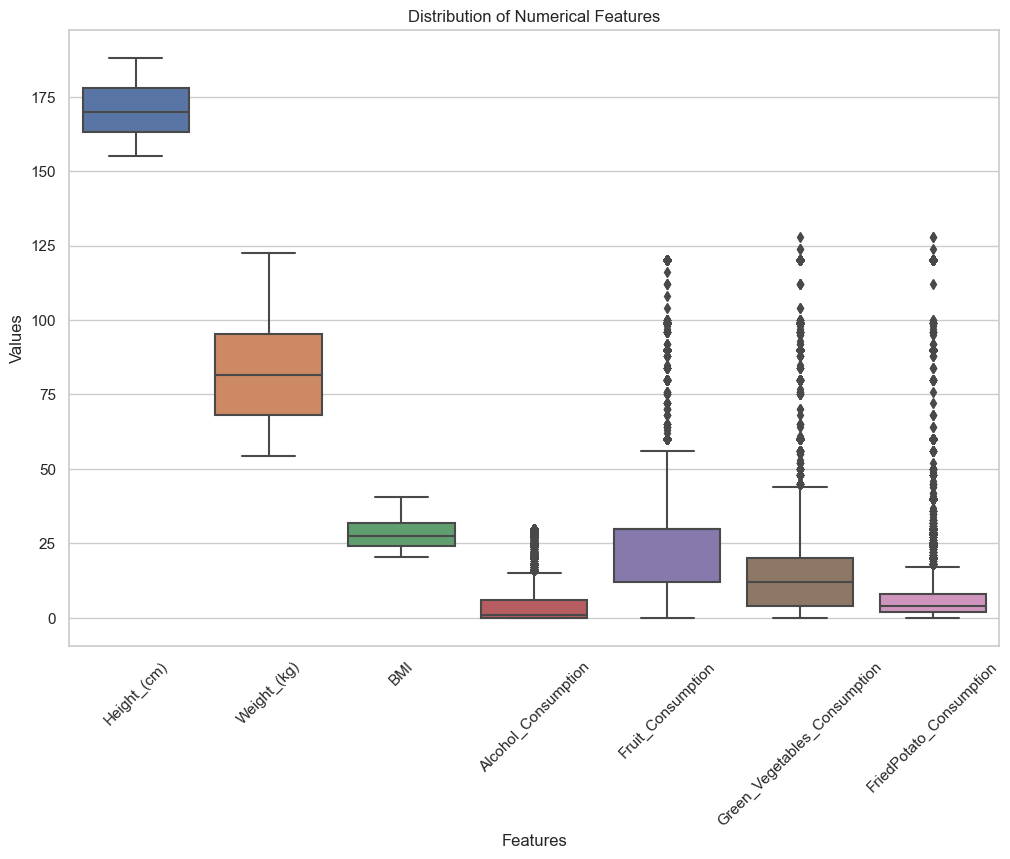

In [34]:
# Univariate Analysis
# Check the distribution of numerical features using box plots
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style of the grid

# Create a box plot for each numerical feature
sns.boxplot(data=data[numerical_features])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

### For categorical columns

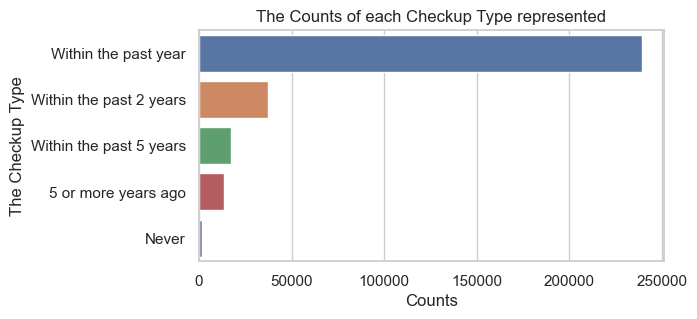

In [50]:
Checkup = data.Checkup.value_counts()
plt.figure(figsize=(6,3))
plt.title("The Counts of each Checkup Type represented")
plt.ylabel('The Checkup Type')
plt.xlabel('Counts')

sns.barplot(y=Checkup.index, x= Checkup.values);

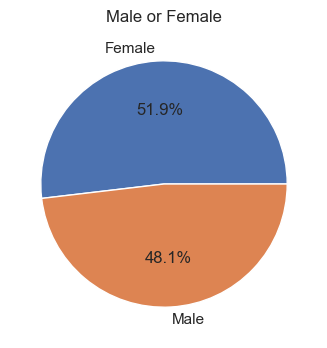

In [51]:
Sex = data.Sex.value_counts()
plt.figure(figsize=(8,4))
plt.title("Male or Female")
plt.pie(Sex, labels=Sex.index, autopct='%.1f%%');

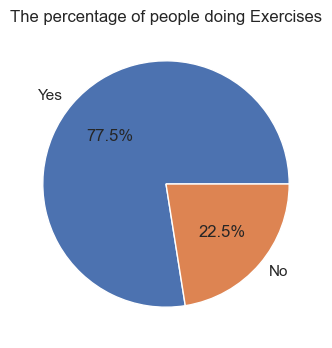

In [53]:
Exercise   = data.Exercise.value_counts()

plt.figure(figsize=(8,4))
plt.title("The percentage of people doing Exercises")
plt.pie(Exercise, labels=Exercise.index, autopct='%.1f%%');

#### disease columns

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the variables you want to plot
variables = ["Heart_Disease", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Arthritis"]

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10), dpi=700)

# Loop through the variables and plot pie charts
for i, var in enumerate(variables):
    # Get the row and column index of the subplot
    row = i // 2
    col = i % 2
    
    # Get the frequency counts of the variable
    counts = data[var].value_counts()
    
    # Plot the pie chart on the corresponding subplot
    axes[row, col].pie(counts, labels=counts.index, autopct="%.1f%%")
    
    # Set the title of the subplot
    axes[row, col].set_title(f"The percentage of survey participants Having {var}")

# Adjust the layout to avoid overlapping
plt.tight_layout(pad=2)

# Show the figure
plt.show()

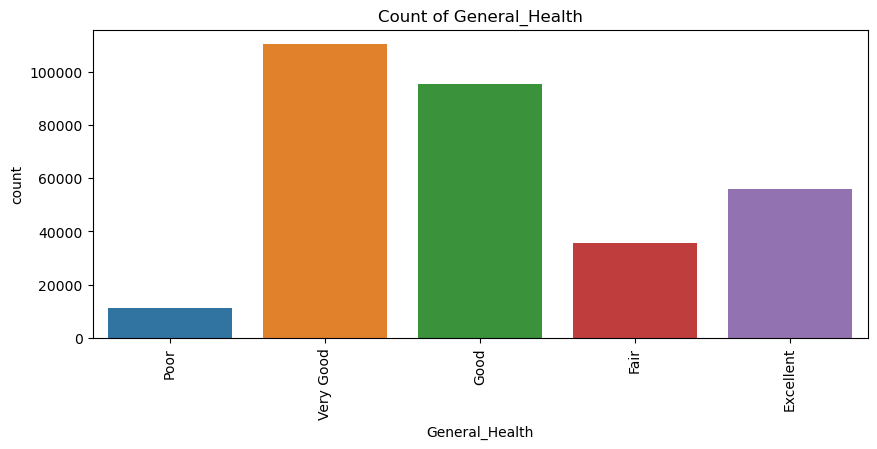

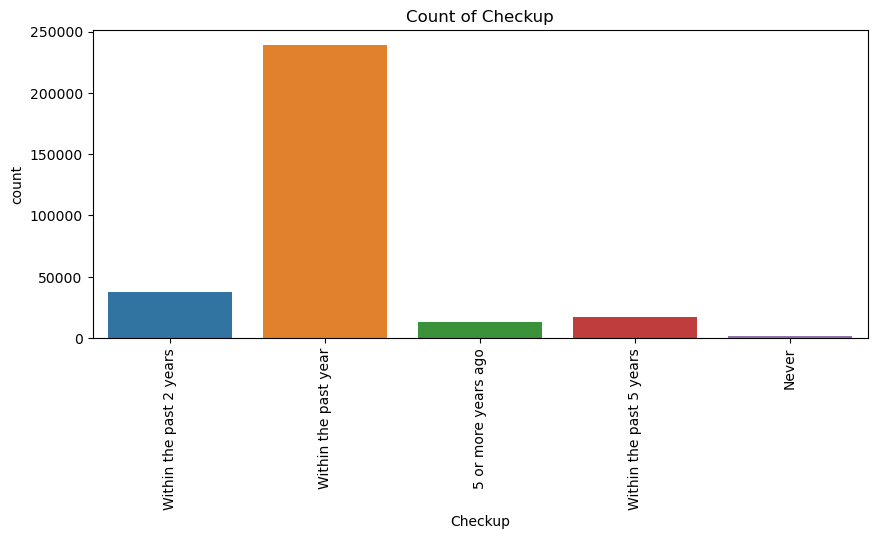

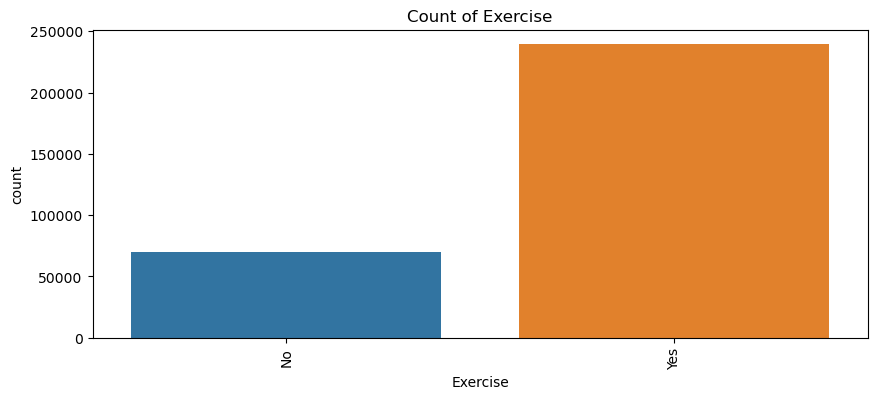

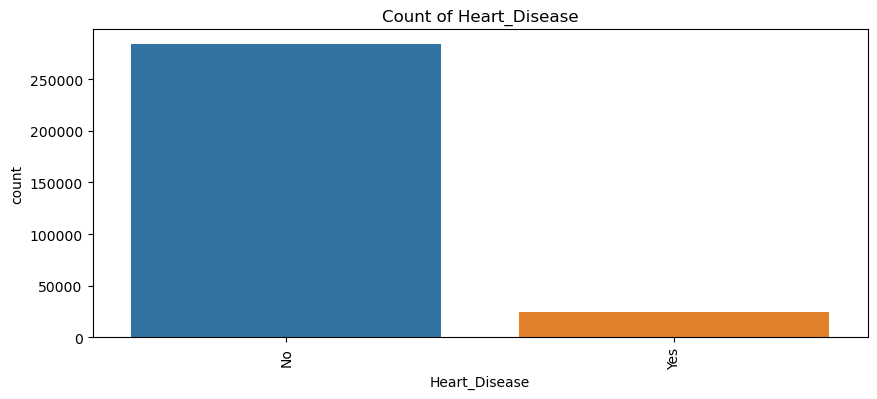

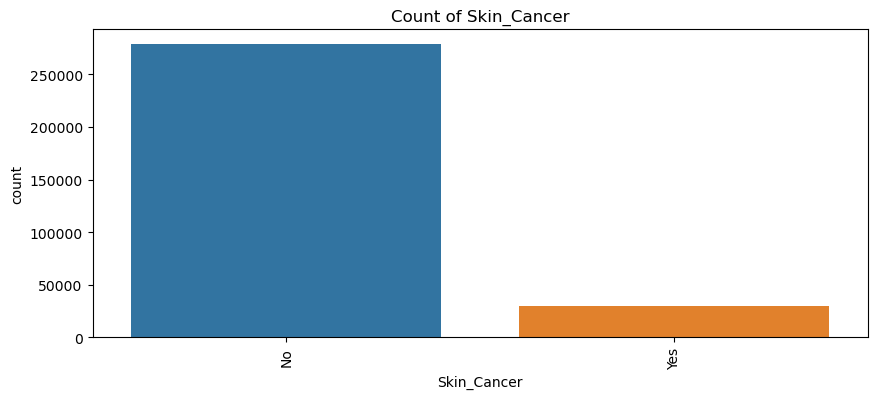

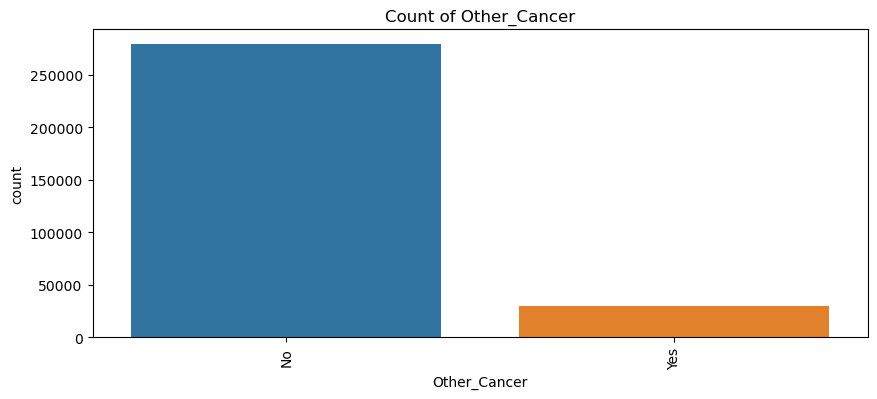

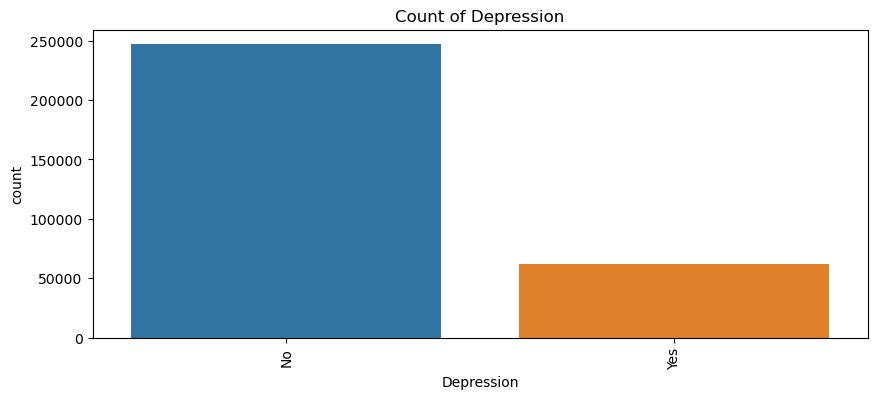

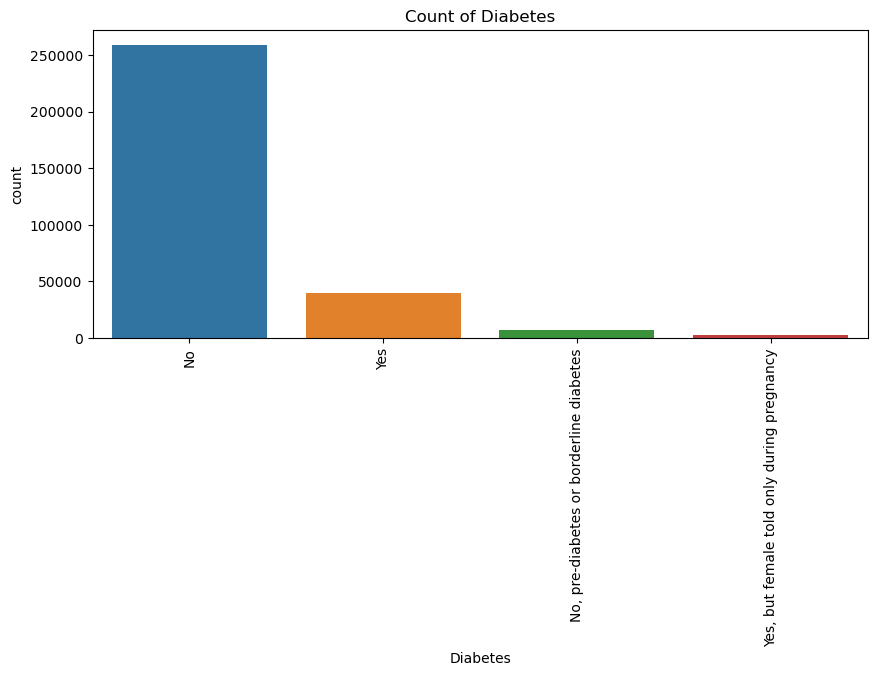

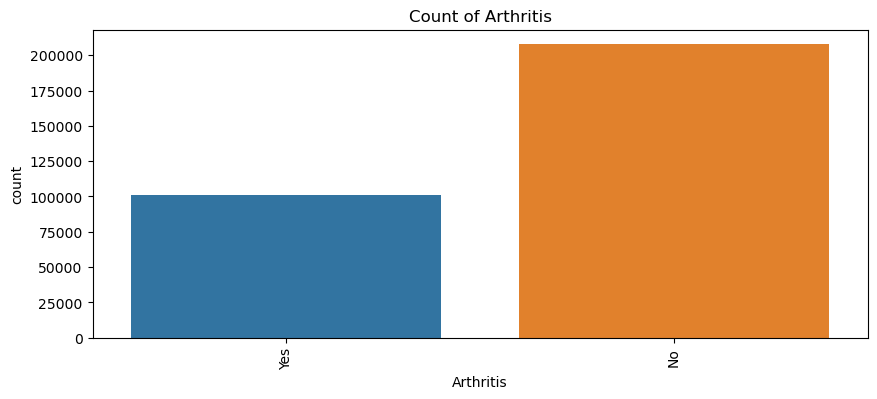

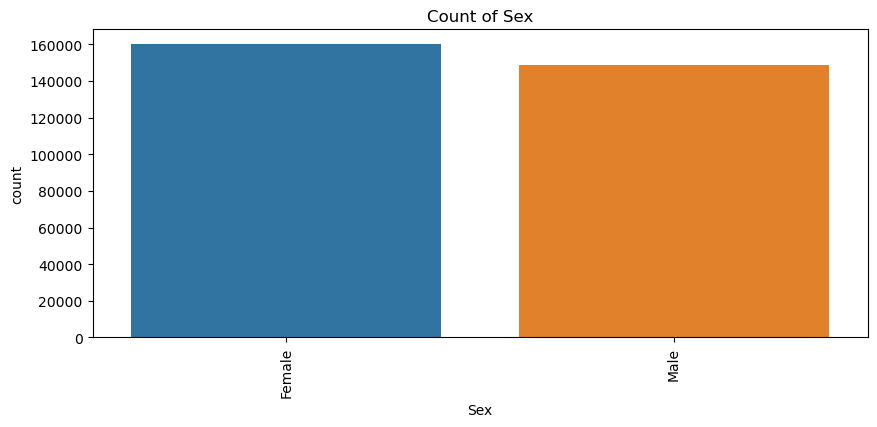

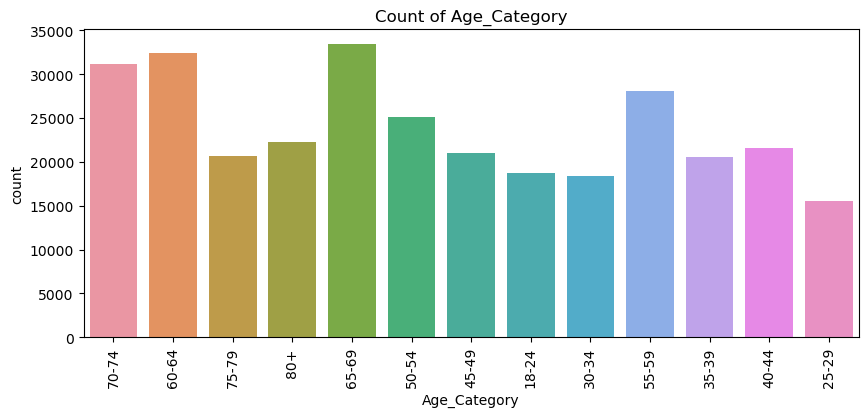

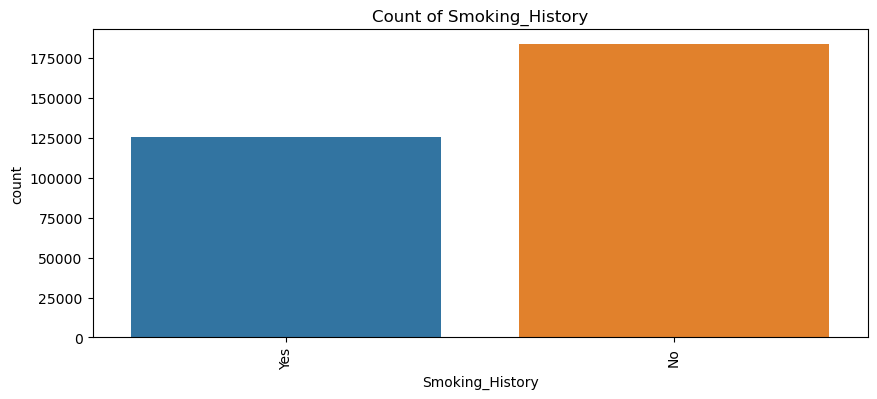

In [17]:
# Check the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

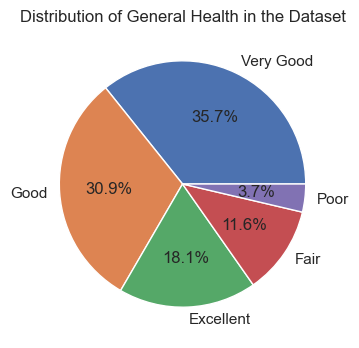

In [48]:
General_Health = data.General_Health.value_counts()
plt.figure(figsize=(8,4))
plt.title("Distribution of General Health in the Dataset")
plt.pie(General_Health, labels=General_Health.index, autopct='%.1f%%');

<Axes: xlabel='Weight_(kg)', ylabel='Height_(cm)'>

C:\Users\ziyan\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\ziyan\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


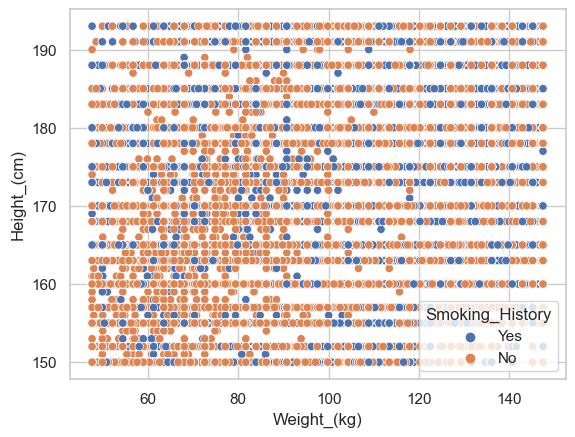

In [73]:
sns.scatterplot(data=data, x="Weight_(kg)", y="Height_(cm)", hue="Smoking_History")

# Bivariate Analysis

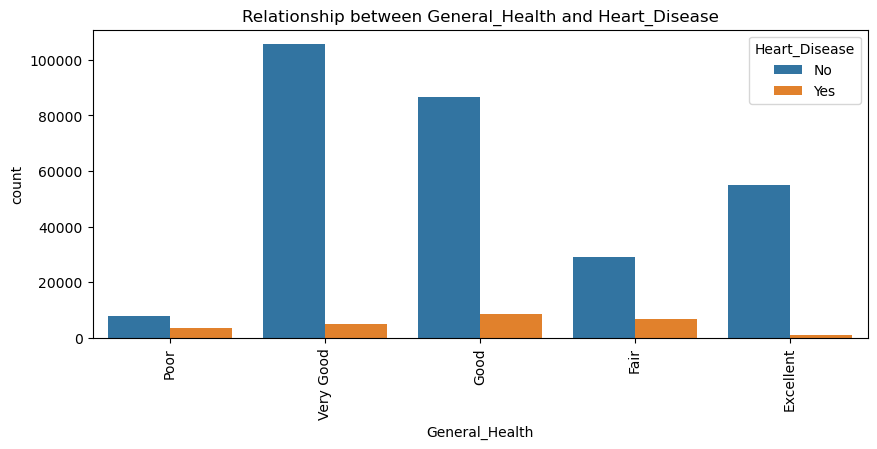

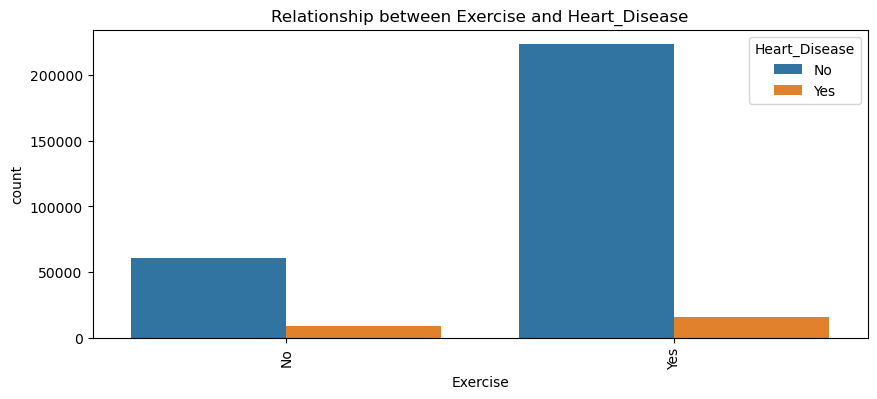

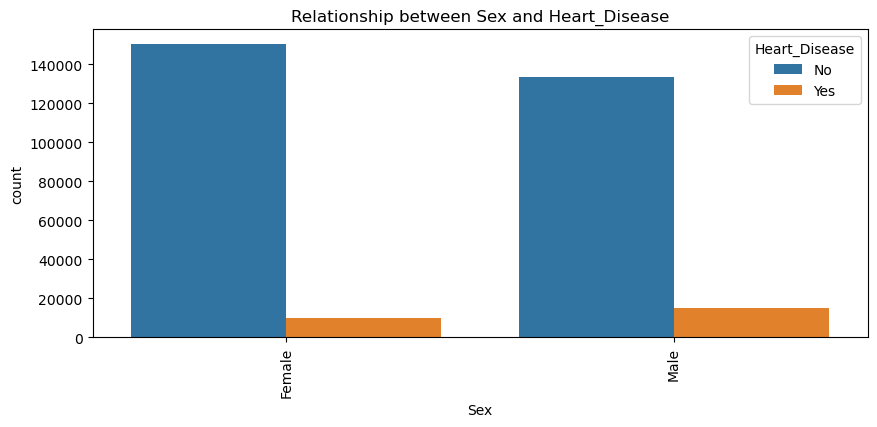

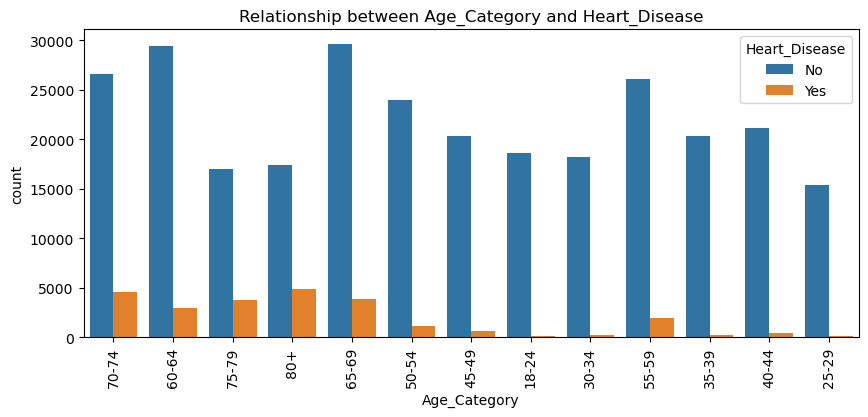

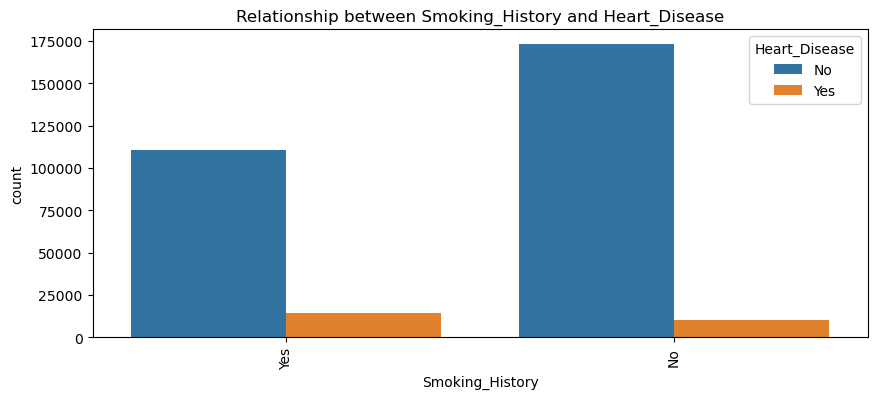

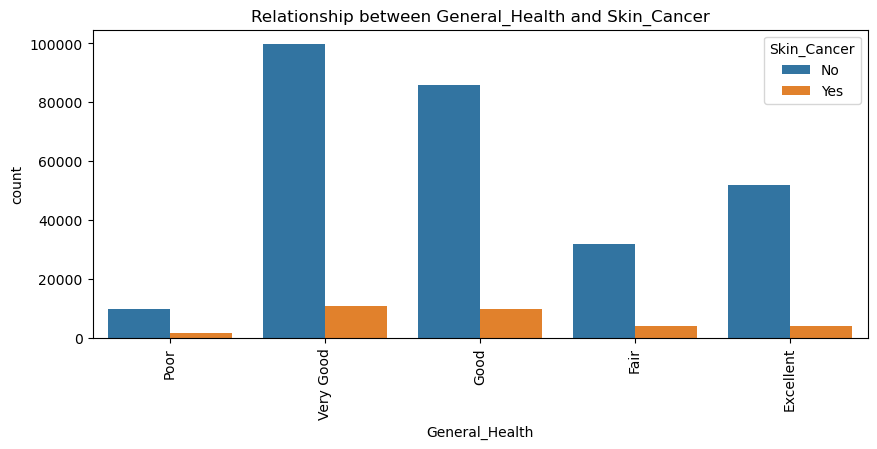

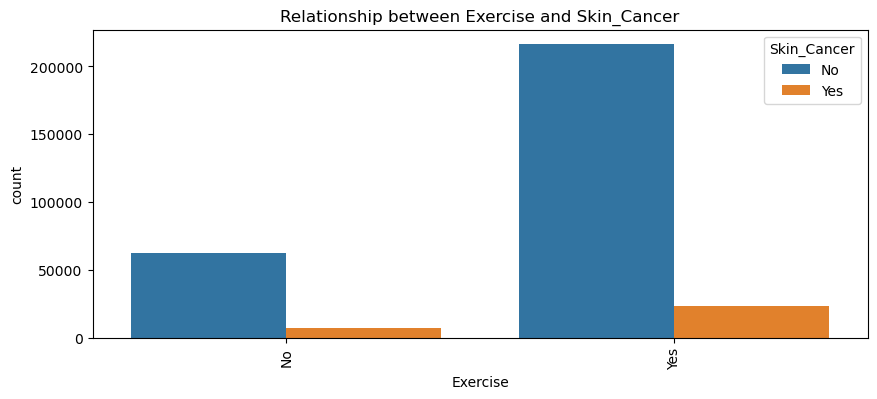

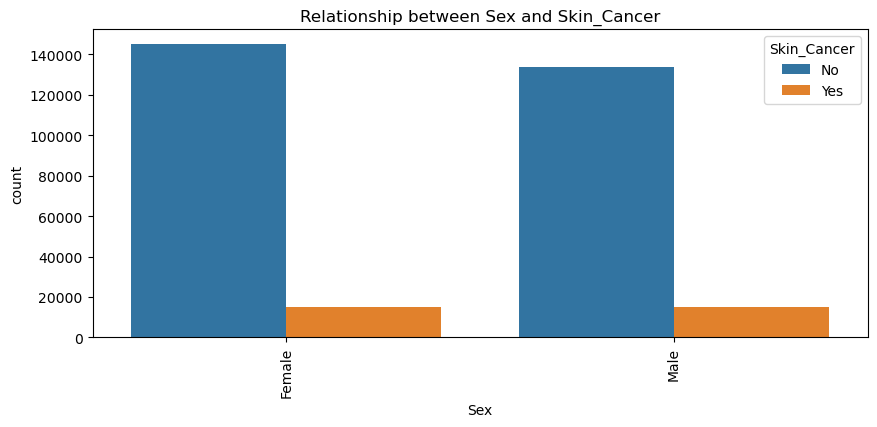

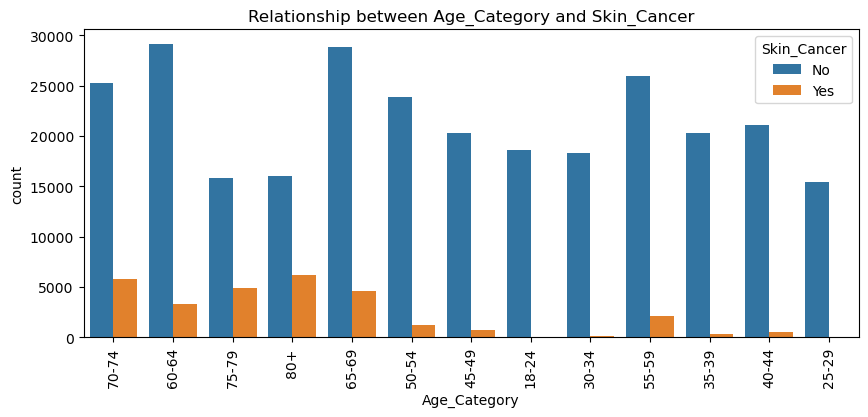

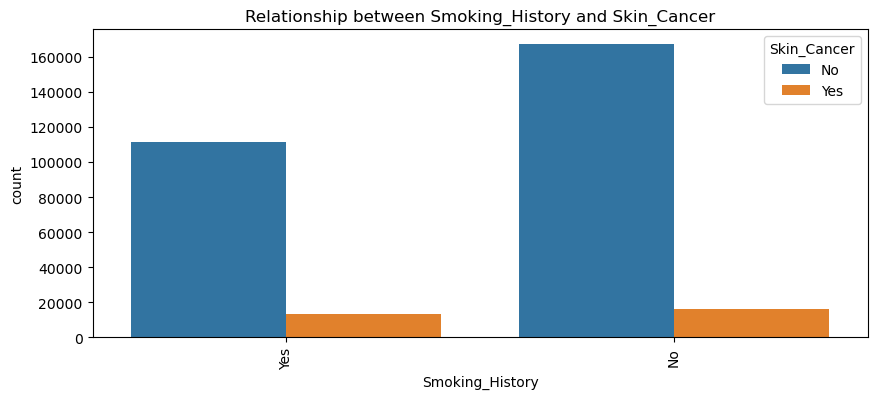

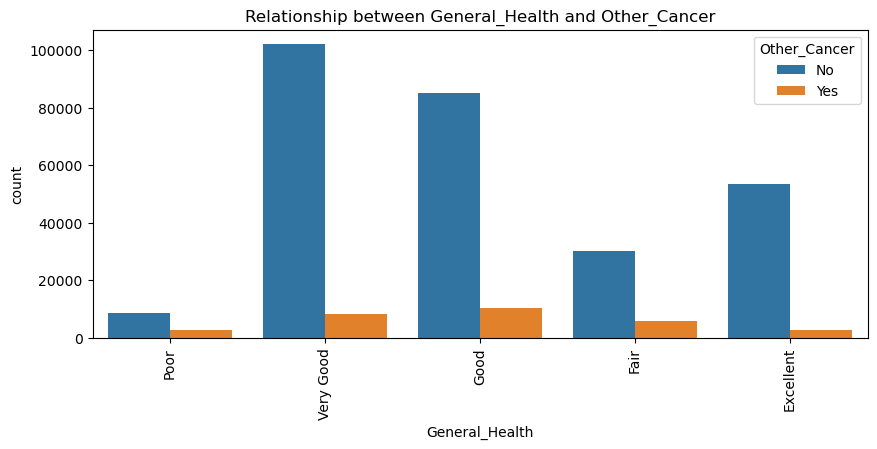

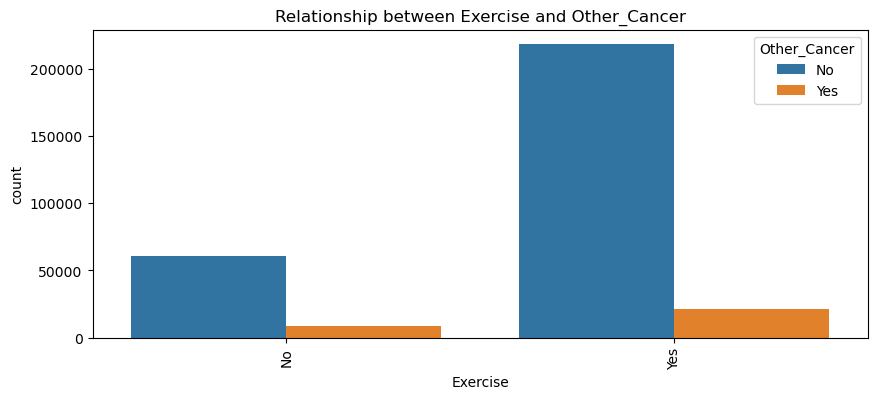

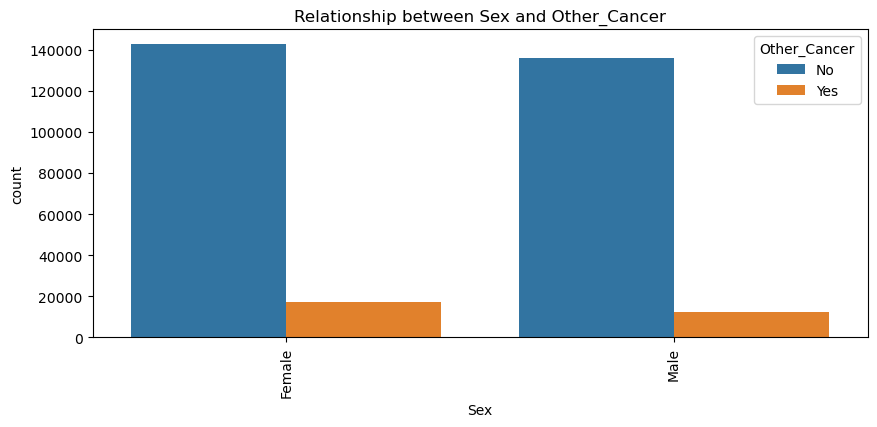

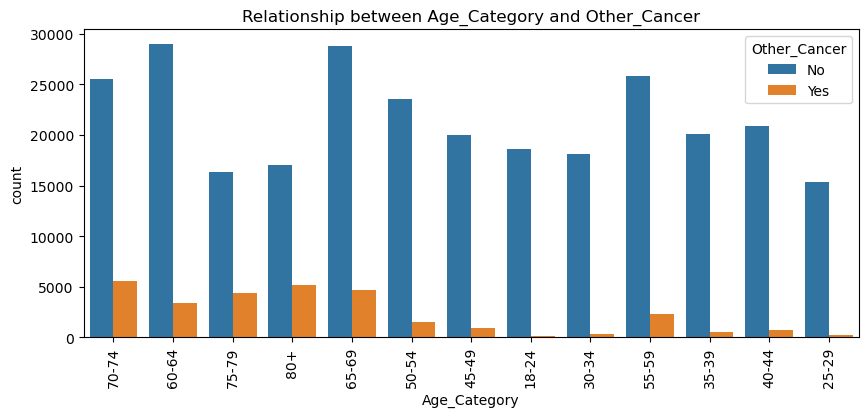

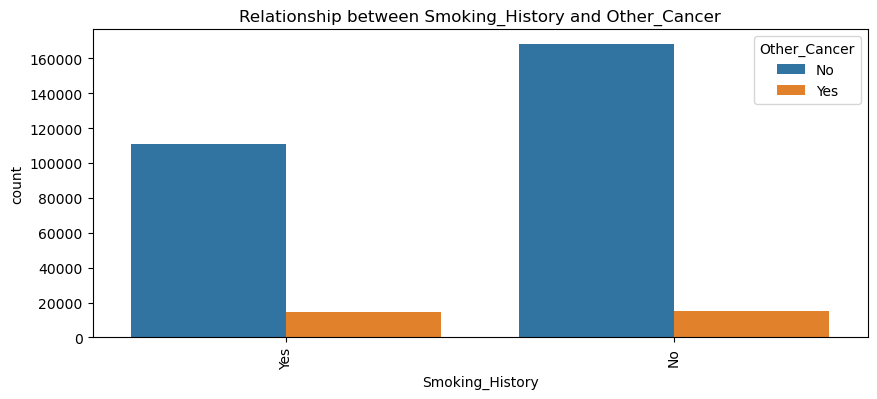

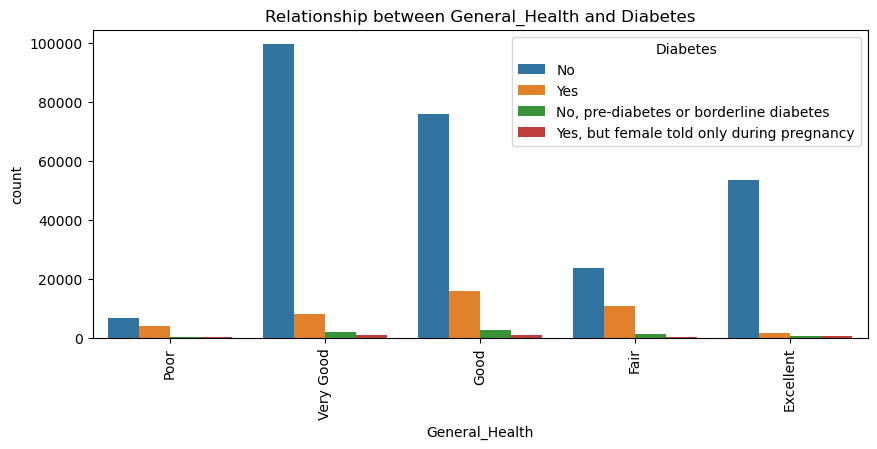

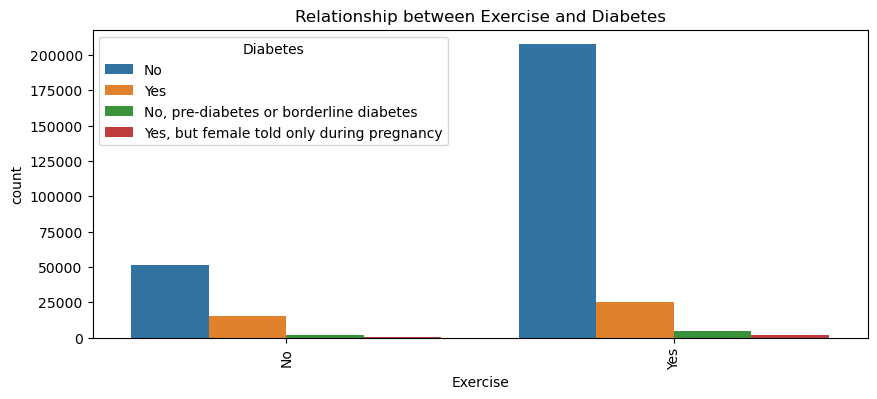

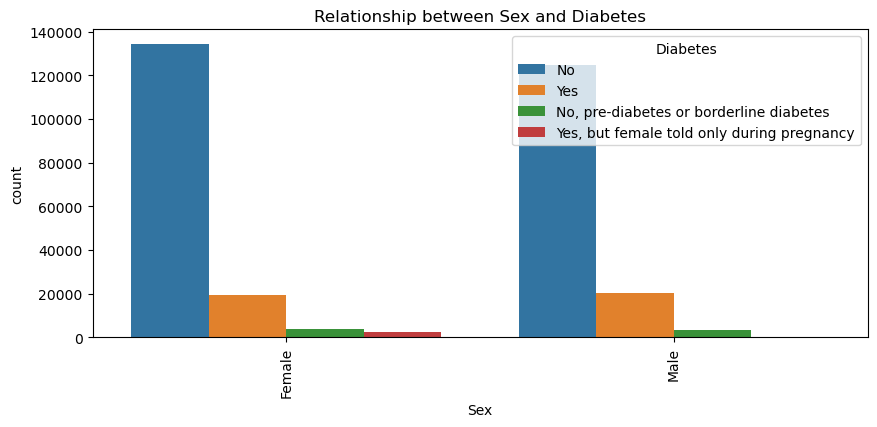

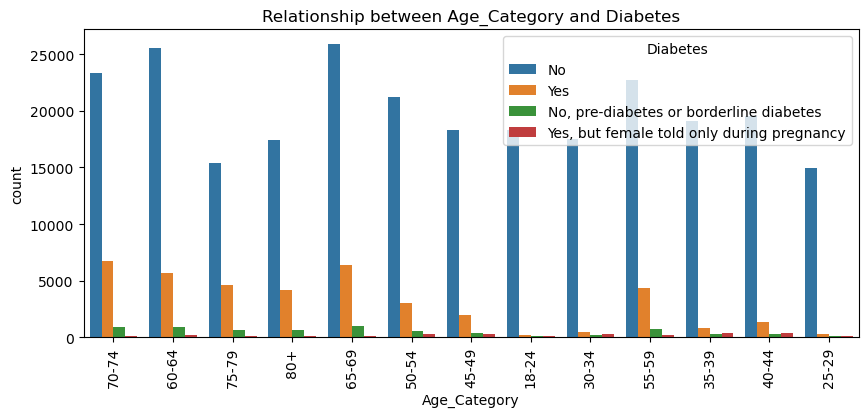

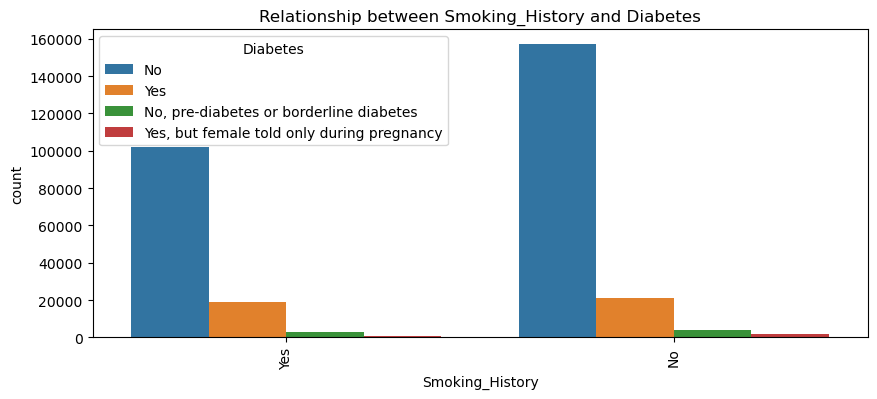

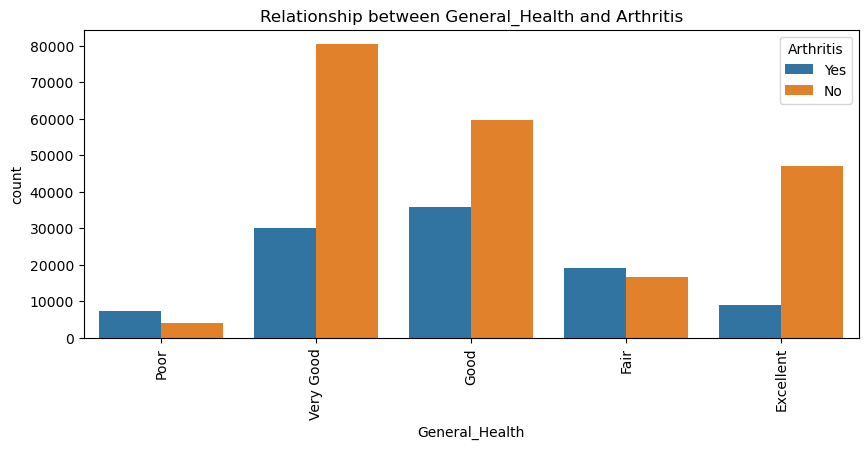

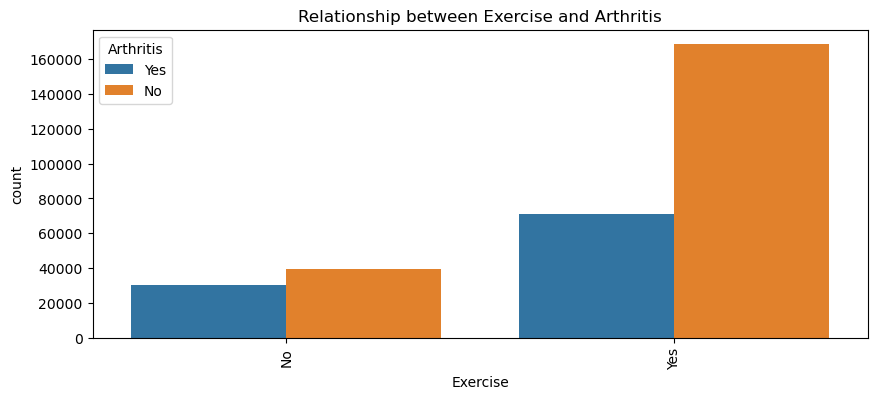

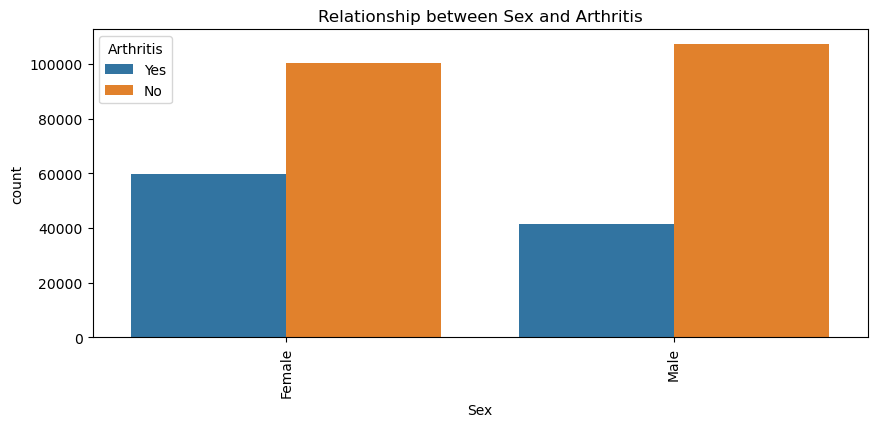

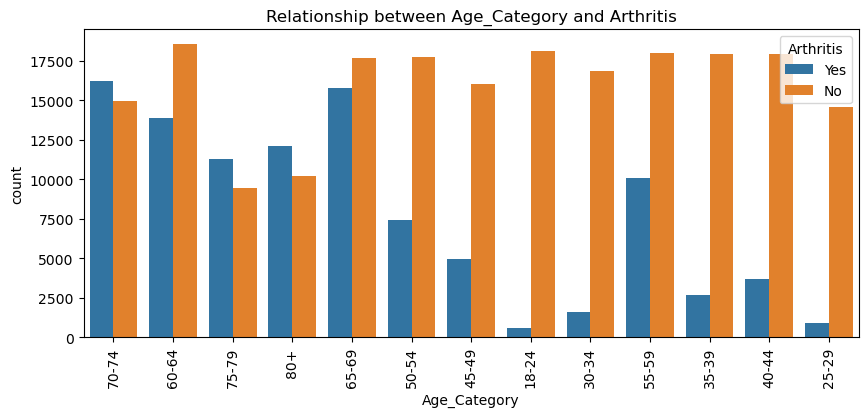

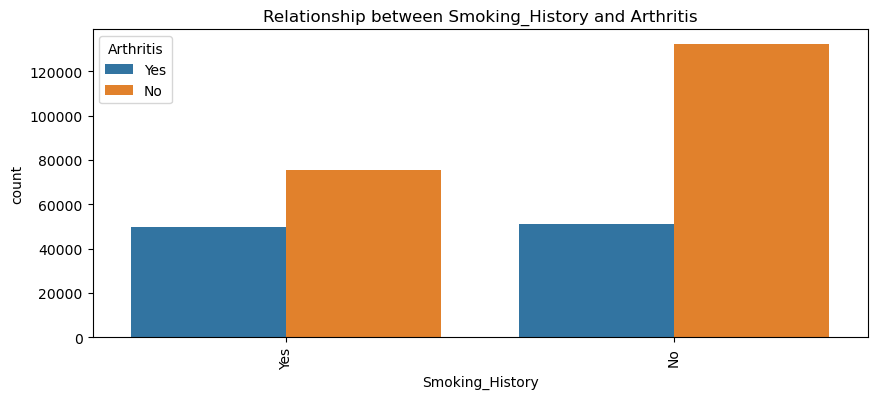

In [18]:
# Analyzing the relationship between the disease conditions and some selected variables

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

# Multivariate Analysis

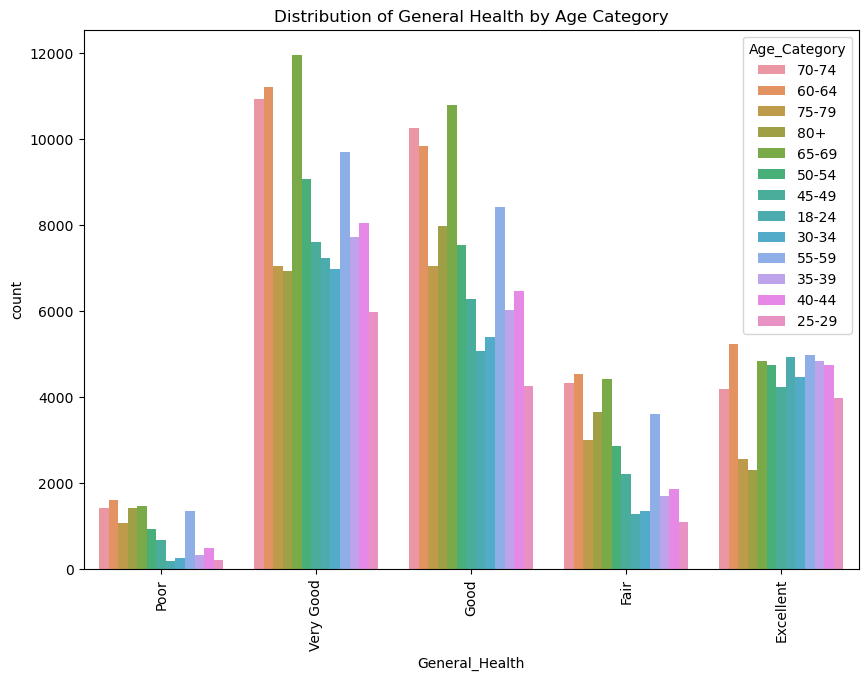

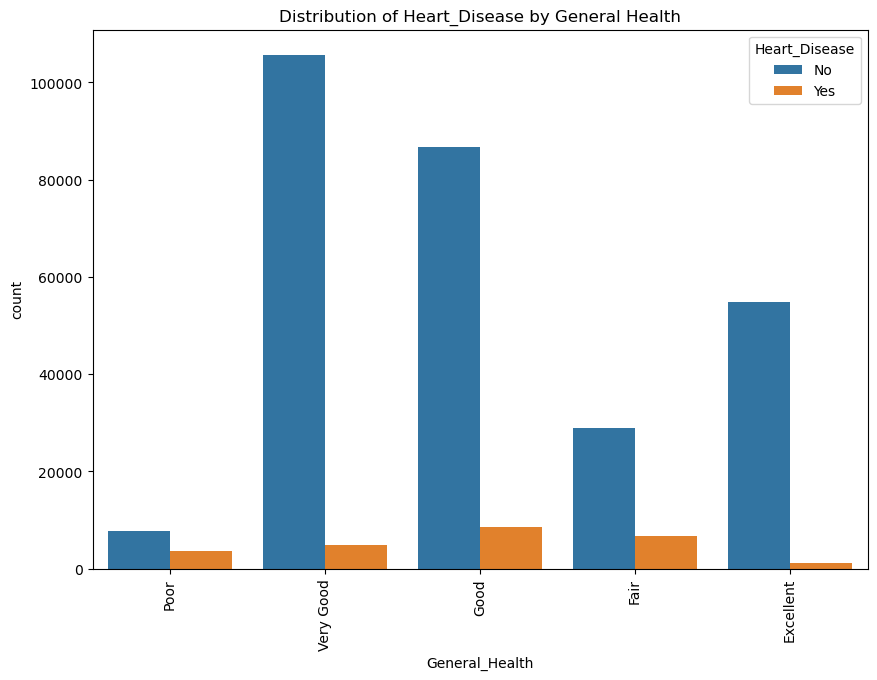

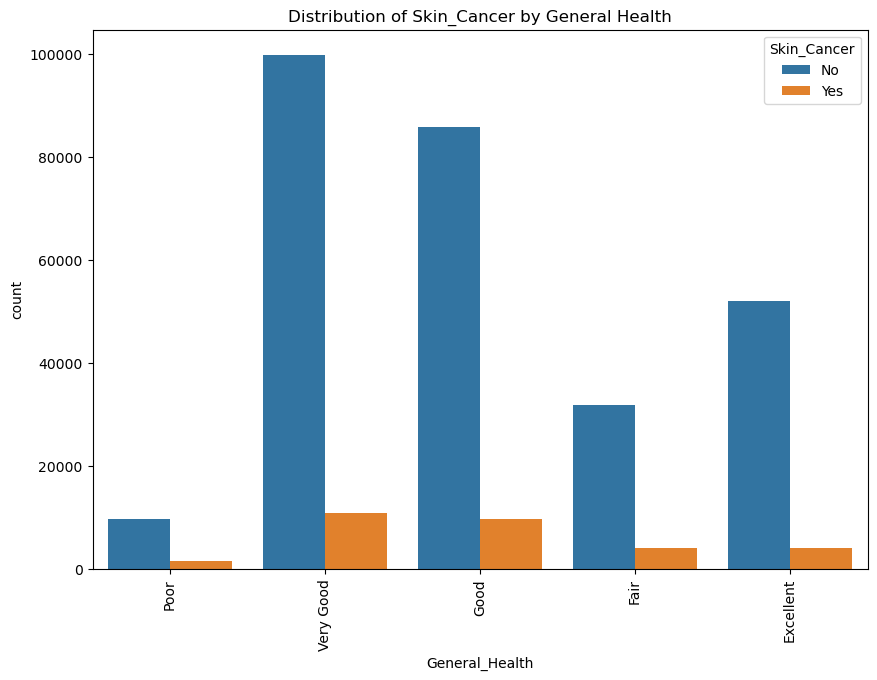

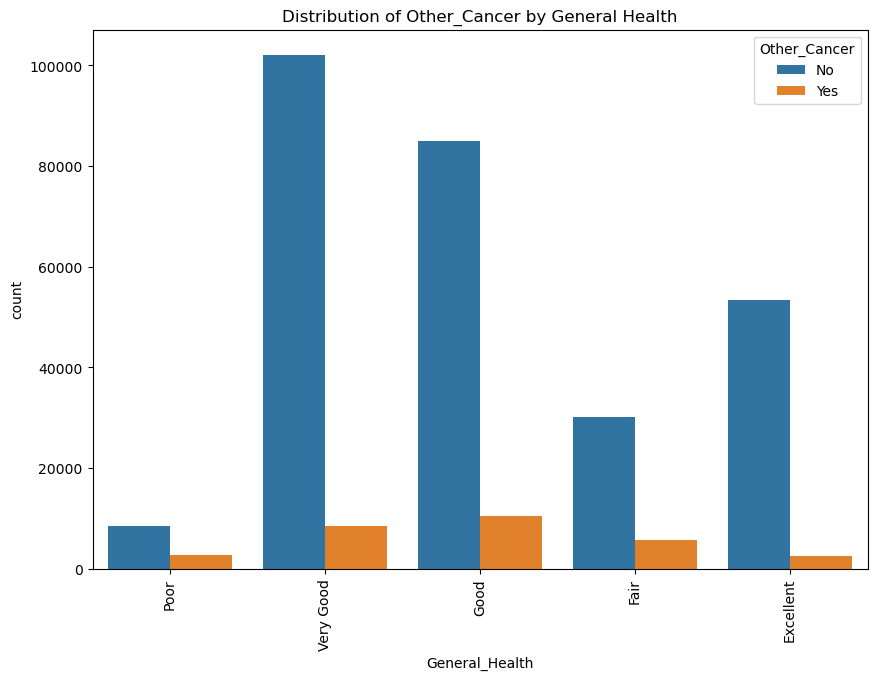

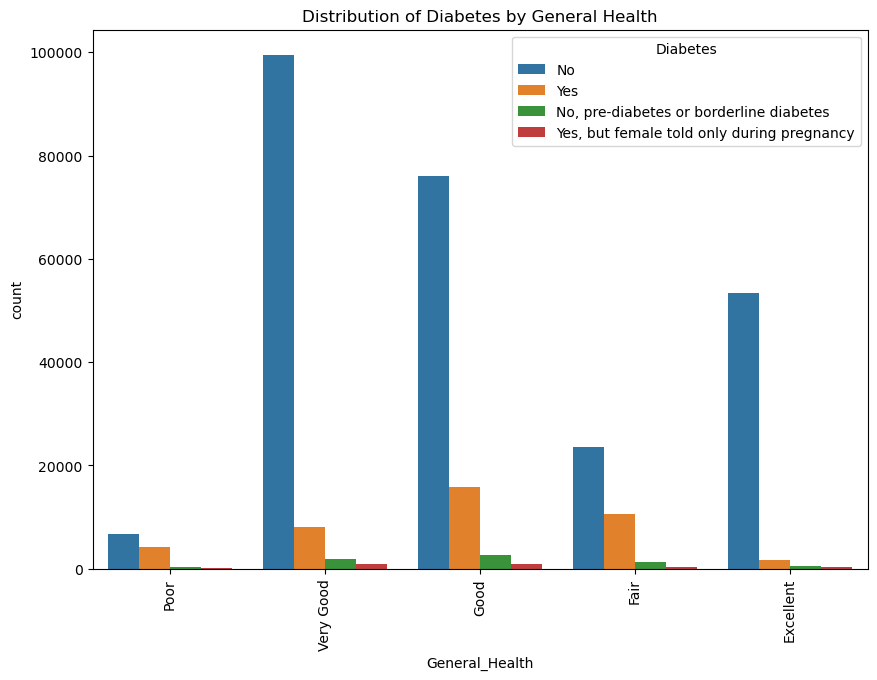

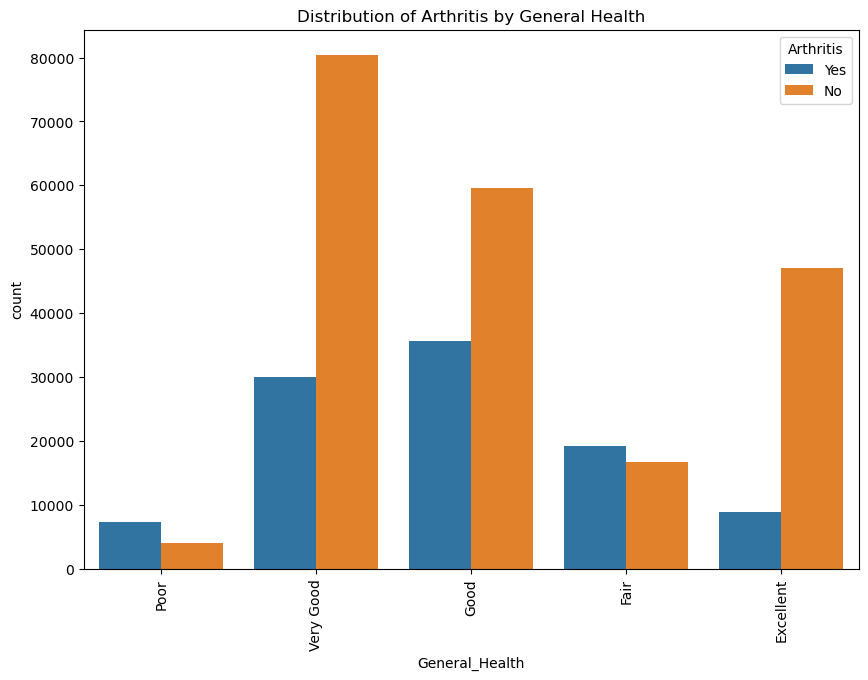

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='General_Health', hue='Age_Category')
plt.title('Distribution of General Health by Age Category')
plt.xticks(rotation=90)
plt.show()

for disease in disease_conditions:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='General_Health', hue=disease)
    plt.title('Distribution of ' + disease + ' by General Health')
    plt.xticks(rotation=90)
    plt.show()